<a href="https://colab.research.google.com/github/Gautami-2607/Kaggle/blob/main/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od 
od.download ('https://www.kaggle.com/competitions/word2vec-nlp-tutorial/data?select=unlabeledTrainData.tsv.zip')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gautamimamidala
Your Kaggle Key: ··········


100%|██████████| 51.7M/51.7M [00:00<00:00, 194MB/s]



Extracting archive ./word2vec-nlp-tutorial/word2vec-nlp-tutorial.zip to ./word2vec-nlp-tutorial


In [ ]:
import pandas as pd

train=pd.read_csv("/content/word2vec-nlp-tutorial/labeledTrainData.tsv.zip", header=0, \
                    delimiter="\t", quoting=3)
test=pd.read_csv("/content/word2vec-nlp-tutorial/testData.tsv.zip", header=0, \
                    delimiter="\t", quoting=3)
unlabel=pd.read_csv("/content/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip", header=0, \
                    delimiter="\t", quoting=3)
data=pd.read_csv('/content/word2vec-nlp-tutorial/sampleSubmission.csv')


In [ ]:
print(train.head())
print(train.isna().sum())
print(train.shape)

         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
id           0
sentiment    0
review       0
dtype: int64
(25000, 3)


In [ ]:
print(test.head())
print(test.isna().sum())
print(test.shape)

           id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...
id        0
review    0
dtype: int64
(25000, 2)


In [ ]:
print(unlabel.head())
print(unlabel.isna().sum())
print(unlabel.shape)

          id                                             review
0   "9999_0"  "Watching Time Chasers, it obvious that it was...
1  "45057_0"  "I saw this film about 20 years ago and rememb...
2  "15561_0"  "Minor Spoilers<br /><br />In New York, Joan B...
3   "7161_0"  "I went to see this film with a great deal of ...
4  "43971_0"  "Yes, I agree with everyone on this site this ...
id        0
review    0
dtype: int64
(50000, 2)


In [ ]:
print(data.head())
print(data.isna().sum())
print(data.shape)

         id  sentiment
0  12311_10          0
1    8348_2          0
2    5828_4          0
3    7186_2          0
4   12128_7          0
id           0
sentiment    0
dtype: int64
(25000, 2)


In [ ]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             

# Initialize the BeautifulSoup object on a single movie review     
example1 = BeautifulSoup(train["review"][0])  

# Print the raw review and then the output of get_text(), for 
# comparison
print(train["review"][0])
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [ ]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

### Putting it all together

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [ ]:
clean_review = review_to_words( train["review"][0] )
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [ ]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append(review_to_words(train["review"][i]))

<ipython-input-19-c75aa9c1d3c4>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


In [ ]:
print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))                                                                    
    clean_train_reviews.append(review_to_words(train["review"][i]))

Cleaning and parsing the training set movie reviews...



<ipython-input-19-c75aa9c1d3c4>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review).get_text()


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



### Creating Features from a Bag of Words (Using scikit-learn)

In [ ]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [ ]:
print(train_data_features.shape)

(25000, 5000)


In [ ]:
# Take a look at the words in the vocabulary
vocab = vectorizer.vocabulary_
print(vocab)
print(len(vocab))

{'stuff': 4267, 'going': 1905, 'moment': 2874, 'started': 4181, 'listening': 2590, 'music': 2933, 'watching': 4834, 'odd': 3068, 'documentary': 1273, 'watched': 4832, 'maybe': 2757, 'want': 4809, 'get': 1873, 'certain': 682, 'insight': 2263, 'guy': 1982, 'thought': 4478, 'really': 3556, 'cool': 947, 'eighties': 1398, 'make': 2688, 'mind': 2835, 'whether': 4878, 'guilty': 1977, 'innocent': 2259, 'part': 3177, 'biography': 423, 'feature': 1645, 'film': 1685, 'remember': 3619, 'see': 3868, 'cinema': 764, 'originally': 3115, 'released': 3605, 'subtle': 4287, 'messages': 2802, 'feeling': 1652, 'towards': 4553, 'press': 3371, 'also': 137, 'obvious': 3059, 'message': 2801, 'drugs': 1337, 'bad': 323, 'kay': 2410, 'visually': 4777, 'impressive': 2217, 'course': 976, 'michael': 2812, 'jackson': 2335, 'unless': 4685, 'remotely': 3626, 'like': 2569, 'anyway': 201, 'hate': 2026, 'find': 1695, 'boring': 483, 'may': 2756, 'call': 594, 'making': 2693, 'movie': 2912, 'fans': 1617, 'would': 4962, 'say':

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

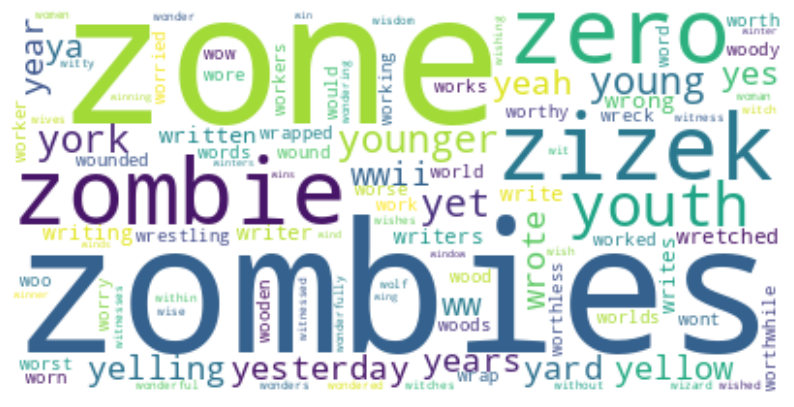

In [ ]:
wordcloud = WordCloud(background_color='white', max_words=100, colormap='viridis')
wordcloud.generate_from_frequencies(vocab)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()